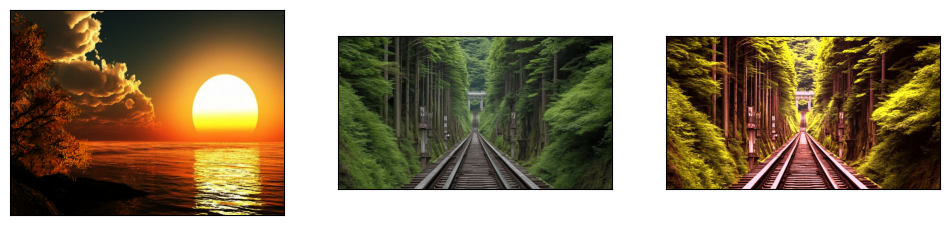

In [23]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
os.chdir(r'/kaggle/input/reinhard-images')
source=cv2.imread('source.jpg')
target=cv2.imread('target.png')
show_target=target.copy()
source=cv2.cvtColor(source,cv2.COLOR_BGR2LAB)
target=cv2.cvtColor(target,cv2.COLOR_BGR2LAB)
source=cv2.resize(source,(640,480))

def get_mean_std(img):
    mean,std=cv2.meanStdDev(img)
    mean=np.hstack(np.around(mean,2))
    std=np.hstack(np.around(std,2))

    return mean,std
def rainhard(source,target):
    mean_source,std_source=get_mean_std(source)
    mean_target,std_target=get_mean_std(target)
    for idx,channel in enumerate(cv2.split(target)):
        
        channel=((channel-mean_target[idx])*((std_source[idx]/std_target[idx])))+mean_source[idx]
        channel=np.where(channel>0,channel,0)
        channel=np.where(channel<255,channel,255)
        target[:,:,idx]=channel
    return target
new_image=rainhard(source,target)
source=cv2.cvtColor(source,cv2.COLOR_LAB2LRGB)
show_target=cv2.cvtColor(show_target,cv2.COLOR_BGR2RGB)
new_image=cv2.cvtColor(new_image,cv2.COLOR_LAB2LRGB)

# Create a 1x3 grid of plots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Plot each image in its corresponding subplot
axs[0].imshow(source)
axs[1].imshow(show_target)
axs[2].imshow(new_image)

# Hide the tick labels for all plots
for ax in axs.flat:
    ax.set(xticks=[], yticks=[])

plt.show()